### LOAD DATA (159 removed all NaN)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

In [2]:
df = pd.read_csv("../data/autos_removed_all_mv.csv")
df.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engin-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
1,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
2,158.0,audi,gas,std,4.0,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,5,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
3,158.0,audi,gas,turbo,4.0,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,5,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
4,192.0,bmw,gas,std,2.0,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,4,108,mpfi,3.50,2.8,8.8,101,5800,23,29,16430


### TARGET & FEATURES
- **target**: `'nomalized-losses'`
- **numeric features**: `'num-of-doors', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'num-of-cylinders', 'engin-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'`
- **categorical features**: `'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system', 'fuel-type', 'make'`

In [3]:
dfy = df[['normalized-losses']]
dfX = df.ix[:,1:]

In [4]:
dfX_real = dfX[dfX.describe().columns]
len(dfX_real.columns)

16

In [5]:
dfX_cat = dfX[dfX.columns.difference(dfX_real.columns)]
len(dfX_cat.columns)

8

### VISUALIZE REAL VALUES DIST
- **numeric features**: `'num-of-doors', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'num-of-cylinders', 'engin-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'`

In [6]:
dfX_real.head()

,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engin-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,4.0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.4,10.0,102,5500,24,30,13950
1,4.0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.4,8.0,115,5500,18,22,17450
2,4.0,105.8,192.7,71.4,55.7,2844,5,136,3.19,3.4,8.5,110,5500,19,25,17710
3,4.0,105.8,192.7,71.4,55.9,3086,5,131,3.13,3.4,8.3,140,5500,17,20,23875
4,2.0,101.2,176.8,64.8,54.3,2395,4,108,3.50,2.8,8.8,101,5800,23,29,16430


In [7]:
def pair_plot(df, start_num, end_num, size=1.5):
    sns.pairplot(pd.concat([dfy, df.ix[:,start_num:end_num]], axis=1), size=size)
    plt.show()

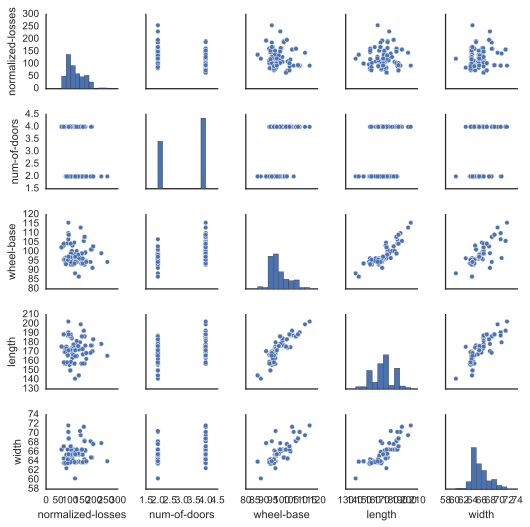

In [8]:
pair_plot(dfX_real, 0, 4)

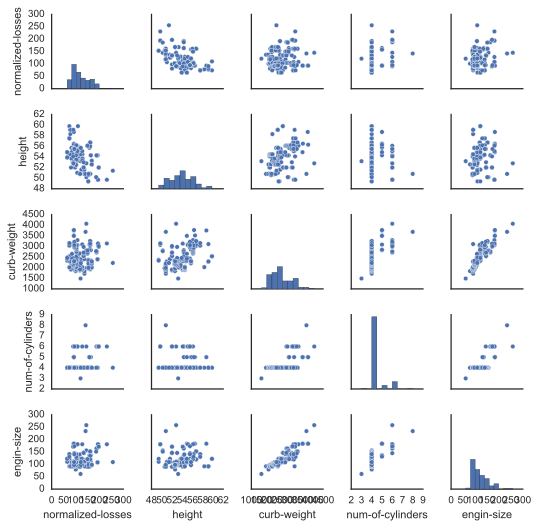

In [9]:
pair_plot(dfX_real, 4, 8)

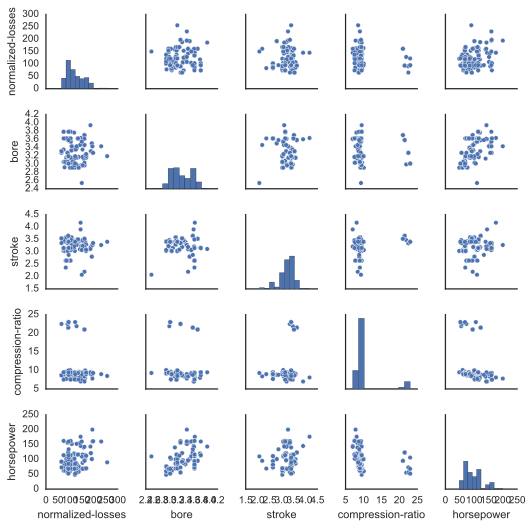

In [10]:
pair_plot(dfX_real, 8, 12)

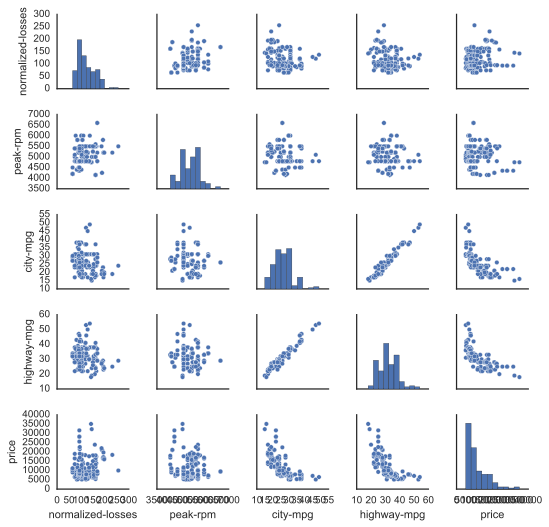

In [11]:
pair_plot(dfX_real, 12, 16)

### VISUALIZE CAT VALUES DIST
- **categorical features**: `'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system', 'fuel-type', 'make'`

In [12]:
def multi_boxplots(df, row, col):
    f, axes = plt.subplots(row, col, figsize=(2.3*col, 3.5*row), sharey=True)
    
    nums = row*col
    
    for num, ax in zip(range(nums), axes.flat):
        try:
            sns.boxplot(x=df[df.columns[num]], y=dfy['normalized-losses'], palette='Set3', ax=ax)
        except:
            pass

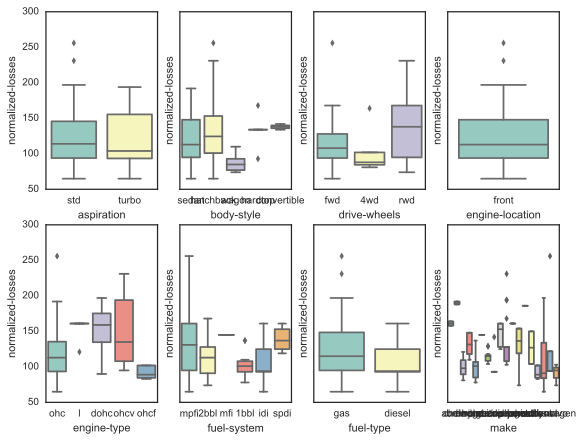

In [13]:
multi_boxplots(dfX_cat, 2, 4)

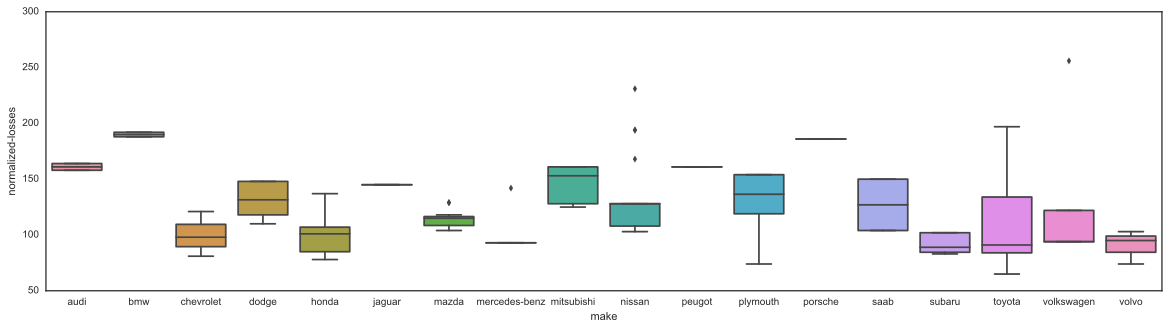

In [14]:
plt.figure(figsize=(20, 5))
sns.boxplot(x=dfX_cat['make'], y=dfy['normalized-losses'])